<a href="https://colab.research.google.com/github/Sanjith-B/Data-Analytics/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  df=pd.read_csv(filename)
df

Saving sales_analysis.csv to sales_analysis.csv


,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-20,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-20,Evening,TAS,Kids,15,37500
7557,30-Dec-20,Evening,TAS,Men,15,37500
7558,30-Dec-20,Evening,TAS,Women,11,27500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [3]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [4]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [8]:
df['State'].value_counts()

 WA     1080
 NT     1080
 SA     1080
 VIC    1080
 QLD    1080
 NSW    1080
 TAS    1080
Name: State, dtype: int64

Before Grouping -

<BarContainer object of 7560 artists>

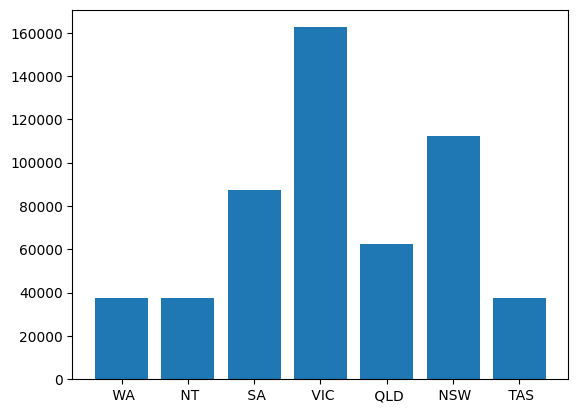

In [19]:
x = df['State']
y = df['Sales']
plt.bar(x,y)

After grouping -

In [3]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
state_sales



,State,Sales
0,NSW,74970000
1,NT,22580000
2,QLD,33417500
3,SA,58857500
4,TAS,22760000
5,VIC,105565000
6,WA,22152500


from matplotlib import pyplot as plt
state_sales['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
state_sales.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
state_sales['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(state_sales['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(state_sales, x='Sales', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

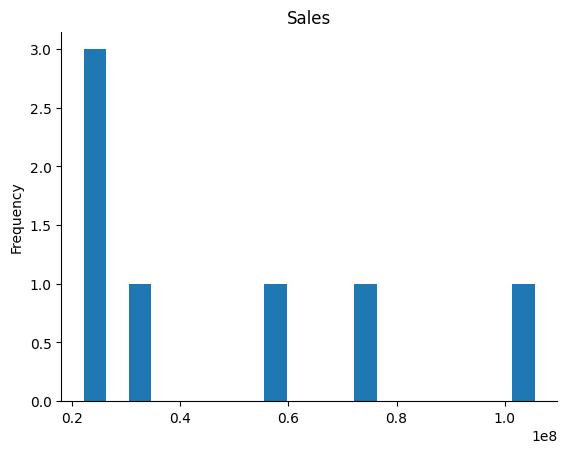

In [4]:
from matplotlib import pyplot as plt
state_sales['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
state_sales['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='State'>

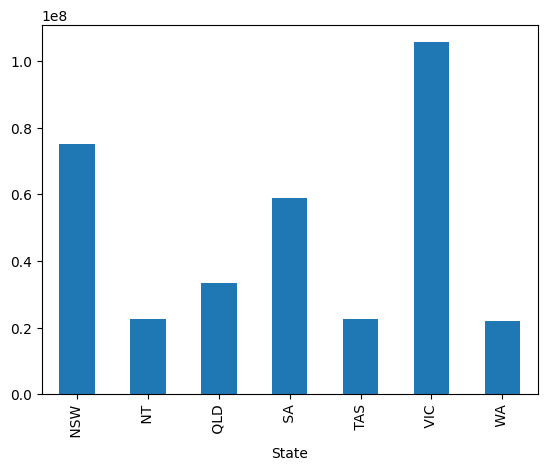

In [36]:
state_sales.plot(kind='bar')



In [7]:
people_sales = df.groupby(['Group'])['Sales'].sum().reset_index()
people_sales



,Group,Sales
0,Kids,85072500
1,Men,85750000
2,Seniors,84037500
3,Women,85442500


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unit,Sales
Unit,1.0,1.0
Sales,1.0,1.0


<ipython-input-11-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

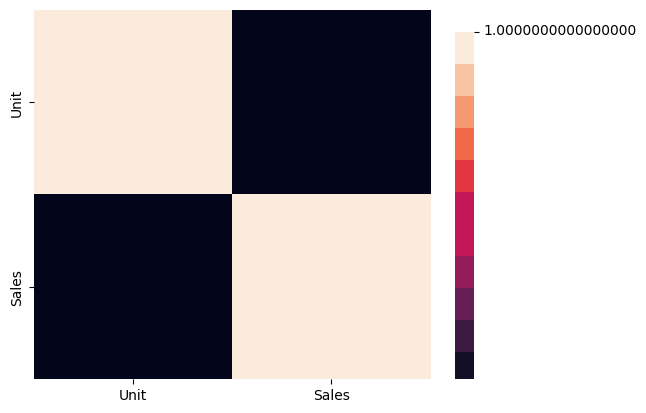

In [11]:
sns.heatmap(df.corr())

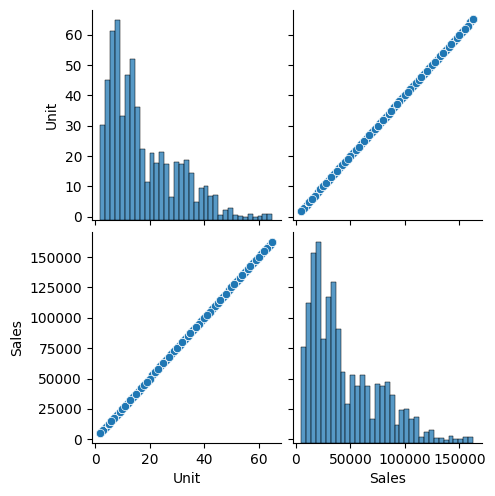

In [12]:
sns.pairplot(df)

<ipython-input-15-87032c1a53f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

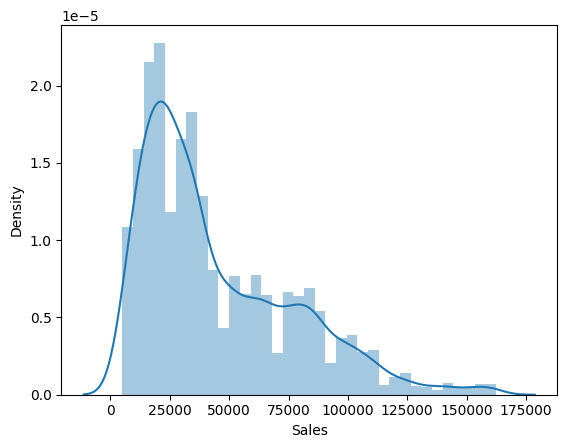

In [15]:
sns.distplot(df['Sales'])

<Axes: ylabel='count'>

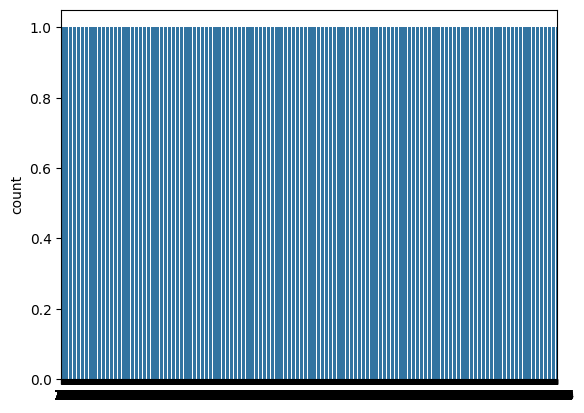

In [17]:
sns.countplot(df['Sales'])

<Axes: xlabel='count', ylabel='Group'>

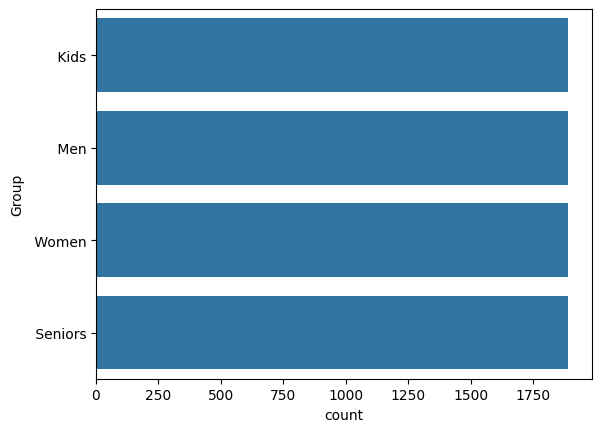

In [20]:
sns.countplot(df['Group'])

<Axes: xlabel='State', ylabel='Sales'>

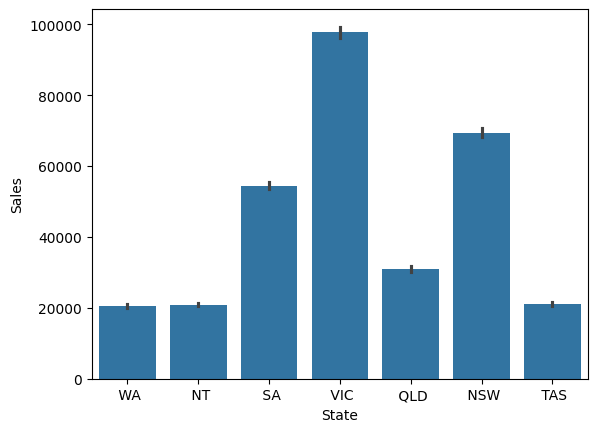

In [22]:
sns.barplot(x=df['State'],y=df['Sales'])

In [40]:
sorted_df = df.sort_values(by='State', ascending=True)
sorted_df


,Date,Time,State,Group,Unit,Sales
4354,22-Nov-20,Evening,NSW,Women,15,37500
2835,04-Nov-20,Morning,NSW,Seniors,33,82500
2836,04-Nov-20,Afternoon,NSW,Kids,34,85000
2837,04-Nov-20,Afternoon,NSW,Men,34,85000
2838,04-Nov-20,Afternoon,NSW,Women,34,85000
...,...,...,...,...,...,...
6059,13-Dec-20,Evening,WA,Seniors,9,22500
6058,13-Dec-20,Evening,WA,Women,5,12500
6057,13-Dec-20,Evening,WA,Men,15,37500
6138,14-Dec-20,Afternoon,WA,Women,5,12500


<BarContainer object of 7560 artists>

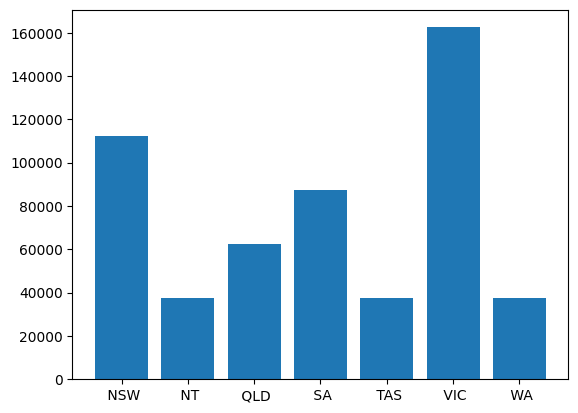

In [41]:
x = sorted_df['State']
y = sorted_df['Sales']
plt.bar(x,y)

Weekly data


In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'coerce' to handle errors gracefully

# Filter out rows with invalid dates (if any)
df = df.dropna(subset=['Date'])

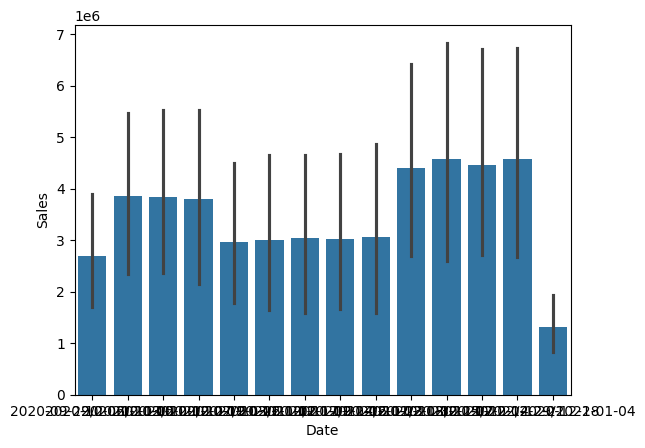

In [6]:
weekly_report = df.groupby([df['State'], df['Date'].dt.to_period('W-Mon')])['Sales'].sum().reset_index()
weekly_report
barplot = sns.barplot(x=weekly_report['Date'],y=weekly_report['Sales'])
barplot.figure.savefig('barplot_image.png')


<Axes: xlabel='State', ylabel='Sales'>

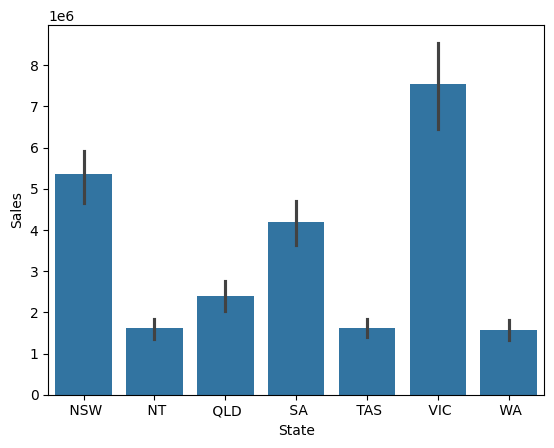

In [26]:
sns.barplot(x=weekly_report['State'],y=weekly_report['Sales'])

<Axes: xlabel='Date', ylabel='Sales'>

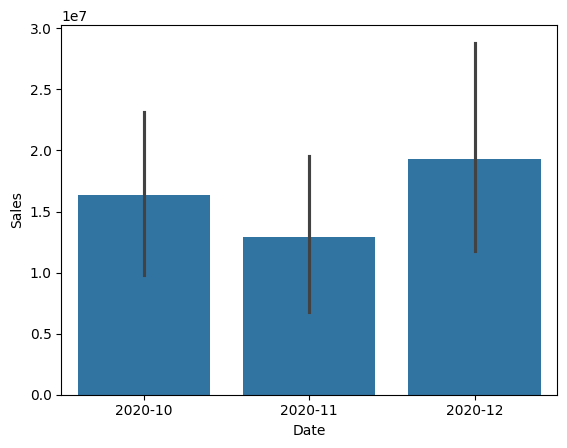

In [33]:
monthly_report = df.groupby([df['State'], df['Date'].dt.to_period('M')])['Sales'].sum().reset_index()
monthly_report
sns.barplot(x=monthly_report['Date'],y=monthly_report['Sales'])



<Axes: xlabel='State', ylabel='Sales'>

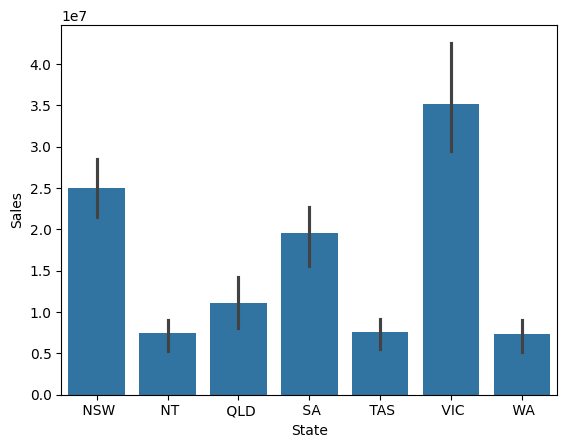

In [27]:
sns.barplot(x=monthly_report['State'],y=monthly_report['Sales'])

In [31]:
monthly_report

,State,Date,Sales
0,NSW,2020-10,25007500
1,NSW,2020-11,21490000
2,NSW,2020-12,28472500
3,NT,2020-10,8222500
4,NT,2020-11,5257500
5,NT,2020-12,9100000
6,QLD,2020-10,11120000
7,QLD,2020-11,8110000
8,QLD,2020-12,14187500
9,SA,2020-10,20610000


In [43]:
#change the number that indicates 10 to the month's number of your choice
month_on_month_data = df[(df['Date'].dt.month == 10)]
month_by_month_sales = month_on_month_data.groupby('State')['Sales'].sum().reset_index()
month_by_month_sales



,State,Sales
0,NSW,25007500
1,NT,8222500
2,QLD,11120000
3,SA,20610000
4,TAS,8015000
5,VIC,33442500
6,WA,7872500


In [44]:
quarterly_report = df.groupby([df['State'], df['Date'].dt.to_period('Q')])['Sales'].sum().reset_index()
quarterly_report

,State,Date,Sales
0,NSW,2020Q4,74970000
1,NT,2020Q4,22580000
2,QLD,2020Q4,33417500
3,SA,2020Q4,58857500
4,TAS,2020Q4,22760000
5,VIC,2020Q4,105565000
6,WA,2020Q4,22152500


In [47]:
people_sales = df.groupby(['Group'])['Sales'].sum().reset_index()
people_sales

,Group,Sales
0,Kids,85072500
1,Men,85750000
2,Seniors,84037500
3,Women,85442500


In [53]:
weekly_report_group = df.groupby([df['Group'], df['Date'].dt.to_period('W-Mon')])['Sales'].sum().reset_index()
weekly_report_group


,Group,Date,Sales
0,Kids,2020-09-29/2020-10-05,4760000
1,Kids,2020-10-06/2020-10-12,6900000
2,Kids,2020-10-13/2020-10-19,6770000
3,Kids,2020-10-20/2020-10-26,6460000
4,Kids,2020-10-27/2020-11-02,5215000
5,Kids,2020-11-03/2020-11-09,5152500
6,Kids,2020-11-10/2020-11-16,5337500
7,Kids,2020-11-17/2020-11-23,5412500
8,Kids,2020-11-24/2020-11-30,5510000
9,Kids,2020-12-01/2020-12-07,7590000


In [57]:
monthly_report_group = df.groupby([df['Group'], df['Date'].dt.to_period('M')])['Sales'].sum().reset_index()
monthly_report_group

,Group,Date,Sales
0,Kids,2020-10,28635000
1,Kids,2020-11,22882500
2,Kids,2020-12,33555000
3,Men,2020-10,28885000
4,Men,2020-11,22615000
5,Men,2020-12,34250000
6,Seniors,2020-10,28565000
7,Seniors,2020-11,22322500
8,Seniors,2020-12,33150000
9,Women,2020-10,28205000


In [24]:
quarterly_report_group = df.groupby([df['Group'], df['Date'].dt.to_period('Q')])['Sales'].sum().reset_index()
quarterly_report_group

,Group,Date,Sales
0,Kids,2020Q4,85072500
1,Men,2020Q4,85750000
2,Seniors,2020Q4,84037500
3,Women,2020Q4,85442500


In [7]:
month_on_month_data = df[(df['Date'].dt.month == 12)]
month_by_month_sales = month_on_month_data.groupby('Group')['Sales'].sum().reset_index()
month_by_month_sales

,Group,Sales
0,Kids,33555000
1,Men,34250000
2,Seniors,33150000
3,Women,34375000


In [26]:
State_groupsucess = df.groupby([df['Group'],df['State'], df['Date'].dt.to_period('Q')])['Sales'].sum().reset_index()
State_groupsucess_df = pd.DataFrame(State_groupsucess)
State_groupsucess_df

,Group,State,Date,Sales
0,Kids,NSW,2020Q4,18587500
1,Kids,NT,2020Q4,5700000
2,Kids,QLD,2020Q4,8510000
3,Kids,SA,2020Q4,14515000
4,Kids,TAS,2020Q4,5775000
5,Kids,VIC,2020Q4,26360000
6,Kids,WA,2020Q4,5625000
7,Men,NSW,2020Q4,19022500
8,Men,NT,2020Q4,5762500
9,Men,QLD,2020Q4,8392500
